## Régression Multiple sur Ventes d’Ordinateurs, Taux de Pollution et Allergies

Vous êtes un data scientist ou analyst travaillant pour une municipalité intéressée par l&#39;étude de
l&#39;impact des technologies et de l&#39;environnement sur la santé publique. Vous avez recueilli des
données sur les ventes annuelles d&#39;ordinateurs, les indices de qualité de l&#39;air (taux de pollution) et le
nombre de patients traités pour des allergies dans une ville de 50 000 habitants, de 2009 à 2015.

### Librairies

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

### Dataset

In [2]:
data = {
    'Année': [2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'Nbre PC': [770, 1290, 1980, 2550, 3650, 4480, 5530],
    'Taux de Pollution': [35, 45, 50, 55, 60, 65, 70],
    'Patients': [6150, 7180, 8270, 8810, 9500, 10360, 11450]
}


In [3]:
df = pd.DataFrame(data)
print(df)

   Année  Nbre PC  Taux de Pollution  Patients
0   2009      770                 35      6150
1   2010     1290                 45      7180
2   2011     1980                 50      8270
3   2012     2550                 55      8810
4   2013     3650                 60      9500
5   2014     4480                 65     10360
6   2015     5530                 70     11450


###  Nuage de points 3D

Représenter le nuage de points (xi, yi) et (zi, yi) dans un espace bidimensionnel ou (xi, zi, yi) en 3D et
interpréter la distribution des données.

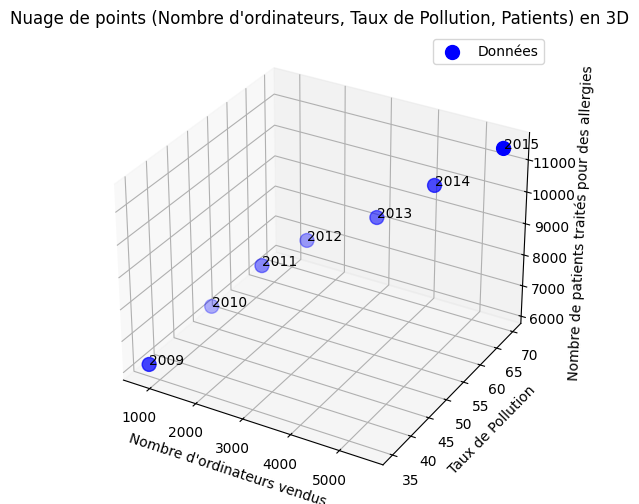

In [11]:
# Extraction des données
xi = df['Nbre PC']
zi = df['Taux de Pollution']
yi = df['Patients']

# Représentation du nuage de points (xi, zi, yi) en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Nuage de points
ax.scatter(xi, zi, yi, color='blue', marker='o', s=100, label='Données')

# Ajout des annotations pour chaque point
for i, txt in enumerate(df['Année']):
    ax.text(xi[i], zi[i], yi[i], '%d' % txt, color='black')

# Réglage des étiquettes des axes
ax.set_xlabel('Nombre d\'ordinateurs vendus')
ax.set_ylabel('Taux de Pollution')
ax.set_zlabel('Nombre de patients traités pour des allergies')

# Titre du graphique
plt.title('Nuage de points (Nombre d\'ordinateurs, Taux de Pollution, Patients) en 3D')

# Affichage de la légende
plt.legend()

# Affichage du graphique
plt.show()

### Analyse descriptive
Calculer la moyenne et la variance pour chaque variable (xi, zi, yi) et interpréter ces statistiques
descriptives.

In [13]:
# Calcul de la moyenne pour chaque variable
moyenne_xi = round(df['Nbre PC'].mean(), 2)
moyenne_zi = round(df['Taux de Pollution'].mean(), 2)
moyenne_yi = round(df['Patients'].mean(), 2)

# Calcul de la variance pour chaque variable
variance_xi = round(df['Nbre PC'].var(), 2)
variance_zi = round(df['Taux de Pollution'].var(), 2)
variance_yi = round(df['Patients'].var(), 2)

# Affichage des résultats
print("Moyenne du nombre d'ordinateurs vendus (xi) :", moyenne_xi)
print("Variance du nombre d'ordinateurs vendus (xi) :", variance_xi)
print("\nMoyenne du taux de pollution (zi) :", moyenne_zi)
print("Variance du taux de pollution (zi) :", variance_zi)
print("\nMoyenne du nombre de patients traités pour des allergies (yi) :", moyenne_yi)
print("Variance du nombre de patients traités pour des allergies (yi) :", variance_yi)


Moyenne du nombre d'ordinateurs vendus (xi) : 2892.86
Variance du nombre d'ordinateurs vendus (xi) : 3012223.81

Moyenne du taux de pollution (zi) : 54.29
Variance du taux de pollution (zi) : 145.24

Moyenne du nombre de patients traités pour des allergies (yi) : 8817.14
Variance du nombre de patients traités pour des allergies (yi) : 3311990.48


### Covariance et Corrélation
Calculer la covariance entre chaque paire de variables.
Calculer les coefficients de corrélation linéaire entre chaque paire de variables et interpréter leur
signification.

In [14]:
# Calcul de la covariance entre chaque paire de variables
covariance_matrix = df.cov()

# Calcul des coefficients de corrélation linéaire entre chaque paire de variables
correlation_matrix = df.corr()

# Affichage des résultats
print("Matrice de covariance :")
print(covariance_matrix)
print("\nMatrice de corrélation :")
print(correlation_matrix)


Matrice de covariance :
                         Année       Nbre PC  Taux de Pollution      Patients
Année                 4.666667  3.721667e+03          25.833333  3.915000e+03
Nbre PC            3721.666667  3.012224e+06       20377.380952  3.116160e+06
Taux de Pollution    25.833333  2.037738e+04         145.238095  2.179762e+04
Patients           3915.000000  3.116160e+06       21797.619048  3.311990e+06

Matrice de corrélation :
                      Année   Nbre PC  Taux de Pollution  Patients
Année              1.000000  0.992637           0.992286  0.995827
Nbre PC            0.992637  1.000000           0.974237  0.986578
Taux de Pollution  0.992286  0.974237           1.000000  0.993858
Patients           0.995827  0.986578           0.993858  1.000000


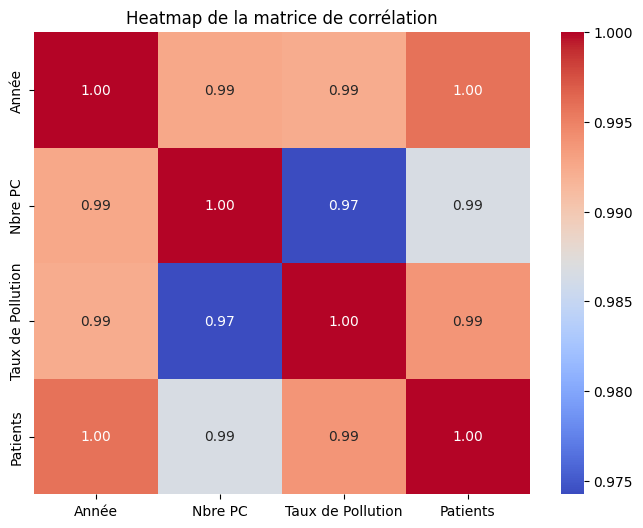

In [15]:
# Création de la heatmap pour la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de la matrice de corrélation')
plt.show()


### Modélisation Statistique
Construire un modèle de régression multiple avec xi (ventes de PC) et zi (taux de pollution) comme
variables explicatives et yi (nombre de patients) comme variable à expliquer.

In [17]:
# Variables explicatives
X = df[['Nbre PC', 'Taux de Pollution']]
# Variable à expliquer
y = df['Patients']

# Ajout d'une constante à la matrice X pour obtenir l'ordonnée à l'origine dans le modèle
X = sm.add_constant(X)

# Construction du modèle de régression multiple
model = sm.OLS(y, X).fit()

# Affichage des résultats de régression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Patients   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     352.3
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           3.19e-05
Time:                        16:32:22   Log-Likelihood:                -43.819
No. Observations:                   7   AIC:                             93.64
Df Residuals:                       4   BIC:                             93.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2454.3898    882.84

C:\Users\Catello\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Interprétation des Coefficients
Interpréter les coefficients obtenus du modèle de régression multiple.

Dans le résumé de la régression fourni, les coefficients estimés sont présentés sous la colonne "coef". Voici comment interpréter ces coefficients :

- const : C'est le coefficient de l'ordonnée à l'origine (constante) dans le modèle de régression. Dans ce cas, le coefficient est de 2454.3898. Cela signifie que lorsque les ventes de PC (xi) et le taux de pollution (zi) sont tous deux égaux à zéro, le nombre de patients (yi) est estimé à 2454.3898.

- Nbre PC : C'est le coefficient associé à la variable explicative "Nbre PC", représentant les ventes d'ordinateurs. Dans ce cas, le coefficient est de 0.3778. Cela signifie que pour chaque augmentation d'une unité dans les ventes d'ordinateurs, le nombre de patients augmente en moyenne de 0.3778, toutes choses étant égales par ailleurs.

- Taux de Pollution : C'est le coefficient associé à la variable explicative "Taux de Pollution". Dans ce cas, le coefficient est de 97.0761. Cela signifie que pour chaque augmentation d'une unité dans le taux de pollution, le nombre de patients augmente en moyenne de 97.0761, toutes choses étant égales par ailleurs.

### Significativité des coefficients

Il est important de noter que la signification des coefficients dépend également des valeurs p associées, qui sont fournies dans la colonne "P>|t|". Dans ce cas, une valeur p inférieure à 0.05 (niveau de signification de 5%) est généralement considérée comme statistiquement significative. 

- Ainsi, le coefficient de la variable "Taux de Pollution" est statistiquement significatif (p-value < 0.05)
- Tandis que le coefficient de la variable "Nbre PC" ne l'est pas (p-value > 0.05).

### Coefficient de détermination (R-squared)

Enfin, le coefficient de détermination (R-squared) est également important pour évaluer la qualité globale du modèle. Dans ce cas, R-squared est de 0.994, ce qui signifie que 99.4% de la variance dans le nombre de patients est expliquée par le taux de pollution dans le modèle.